In [33]:
# Importieren der notwendigen Bibliotheken
import tensorflow as tf
import matplotlib.pyplot as plt

In [34]:
#Datensatz von Tensorflow herunterladen
mnist = tf.keras.datasets.mnist

In [35]:
# Trainingdatensatz zum Lernen und Testdatensatz zum messen der Accuracy
(training_data, training_labels), (test_data, test_labels) = mnist.load_data()
# Durch 255 teilen um Pixel auf Fließkommazahl zu bringen
training_data, test_data = training_data / 255, test_data / 255

In [36]:
# Modell erstellen, sequential von tf benutzen um Layer zu kreieren.
model = tf.keras.Sequential([
    # Input Layer erstellen, Pixelgröße = 28x28 = 784 auf Array flatten
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    # Hidden Layer erstellen, Overfitting vermeiden, daher nicht zu viele Hidden Layer! Insgesamt 128 Layer mashed mit den 784 Neuronen
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    # Output Layer mit Aktivierungsfunktion softmax um insgesamt auf 100& zu kommen.
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [37]:
# Optimizer, Loss und Metriken definieren
model.compile(
    optimizer= tf.optimizers.Adam(),
    # Fehler des Netzwerks erkennen und mit Accuracy bestimmen
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [38]:
model.fit(training_data, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 2.6402 - accuracy: 0.8512
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4112 - accuracy: 0.9041
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3061 - accuracy: 0.9249
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2622 - accuracy: 0.9354
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2349 - accuracy: 0.9404


In [39]:
model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 990us/step - loss: 0.2764 - accuracy: 0.9395


[0.2763630747795105, 0.9394999742507935]

In [40]:
predictions = model.predict(test_data)

313/313 [==============================] - 0s 846us/step


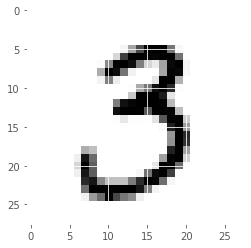

In [41]:
image_index = 90
plt.imshow(test_data[image_index], cmap='Greys')

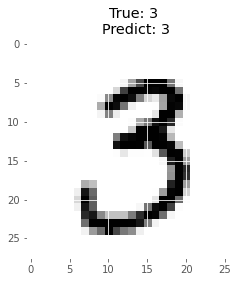

In [43]:
# Testen ob das neuronale Netz die Zahl richtig erkannt hat
plt.title('True: {} \nPredict: {}'.format(test_labels[image_index], np.argmax(predictions[image_index])))
plt.imshow(test_data[image_index], cmap='Greys')

In [46]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, '/content/model/')